In [3]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score #model evaluation

%matplotlib inline

# 1. GOAT

In [4]:
# DATA
hw = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heightWeight.csv")

zScore = StandardScaler() #create a function that will eventually calculate z-scores for us

In [5]:
zScore.fit(hw[["height", "age"]]) #which columns do we want to use to calculate means and sd

z = zScore.transform(hw[["height", "age"]]) #what data do we want to apply the z-score transformation to

hw[["height", "age"]] = z

In [92]:
hw.head()

,height,weight,diet,age
0,161.187053,88.454144,meat,60
1,178.692677,101.895004,meat,50
2,176.647599,97.503690,meat,61
3,205.353240,121.129281,meat,14
4,200.516263,117.490528,meat,44


# Amazon Books (sklearn)

In [93]:
# Data
ama = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/amazon-books.txt",
                 sep = "\t")

In [94]:
ama.head()

,Title,Author,List Price,Amazon Price,Hard/ Paper,NumPages,Publisher,Pub year,ISBN-10,Height,Width,Thick,Weight (oz)
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,7.8,5.5,0.8,11.2
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,8.4,5.5,0.7,7.2
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,8.3,5.2,0.3,4.0
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,0061564893,8.8,6.0,1.6,28.8
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,0307265722,8.0,5.2,1.4,22.4


In [95]:
ama.isnull().sum(axis=0) #how many missing values are there per column

Title           0
Author          1
List Price      1
Amazon Price    0
Hard/ Paper     0
NumPages        2
Publisher       1
Pub year        1
ISBN-10         0
Height          4
Width           5
Thick           1
Weight (oz)     9
dtype: int64

In [96]:
ama = ama.dropna() #drop all missing values originally in the data frame

## Explore

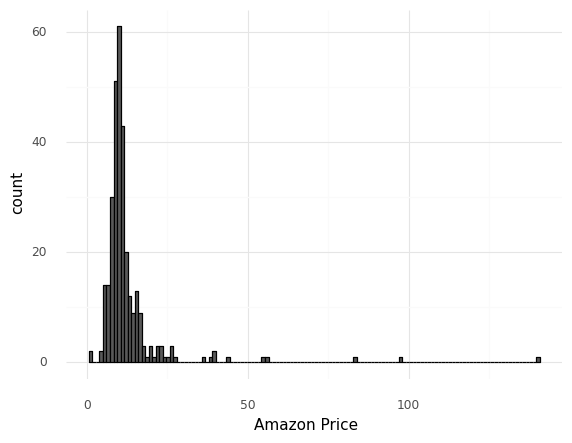

<ggplot: (8786528327729)>

In [97]:
(ggplot(ama, aes("Amazon Price")) + geom_histogram(color = "black") + theme_minimal())

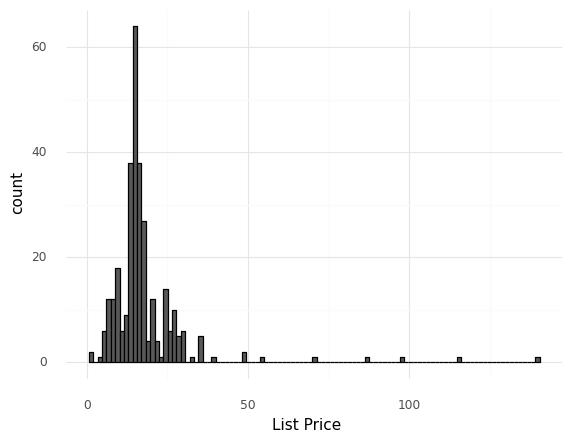

<ggplot: (8786529256165)>

In [98]:
(ggplot(ama, aes("List Price")) + geom_histogram(color = "black") + theme_minimal())

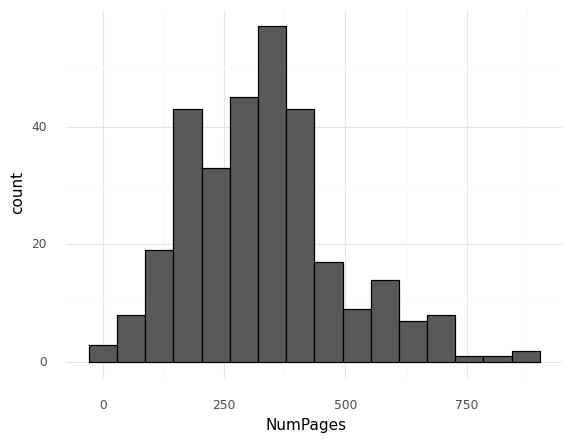

<ggplot: (8786528911020)>

In [99]:
(ggplot(ama, aes("NumPages")) + geom_histogram(color = "black") + theme_minimal())

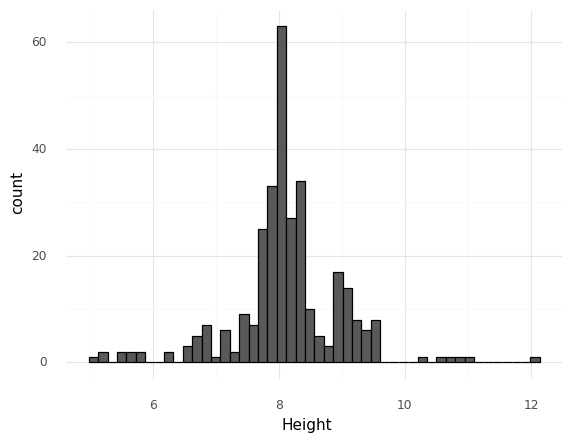

<ggplot: (8786529067054)>

In [100]:
(ggplot(ama, aes("Height")) + geom_histogram(color = "black") + theme_minimal())

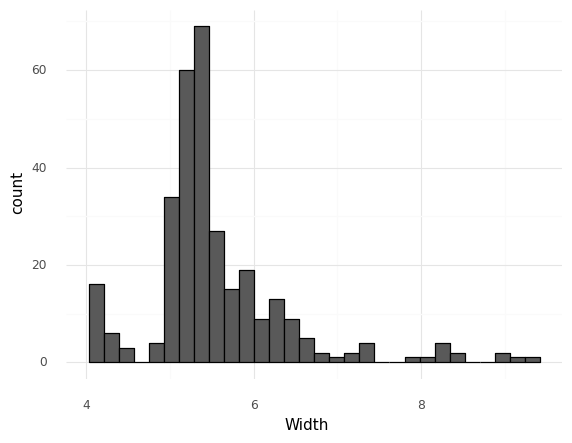

<ggplot: (8786528460138)>

In [101]:
(ggplot(ama, aes("Width")) + geom_histogram(color = "black") + theme_minimal())

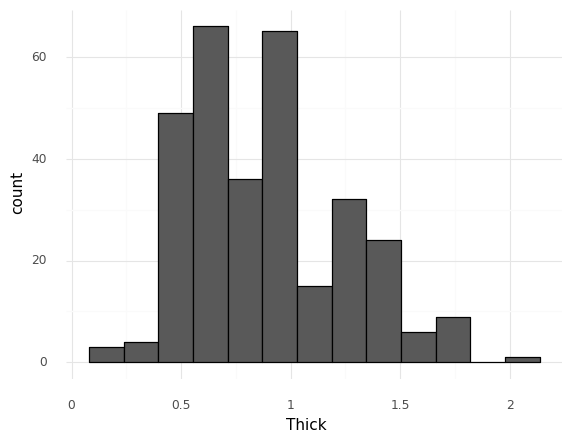

<ggplot: (8786528932991)>

In [102]:
(ggplot(ama, aes("Thick")) + geom_histogram(color = "black") + theme_minimal())

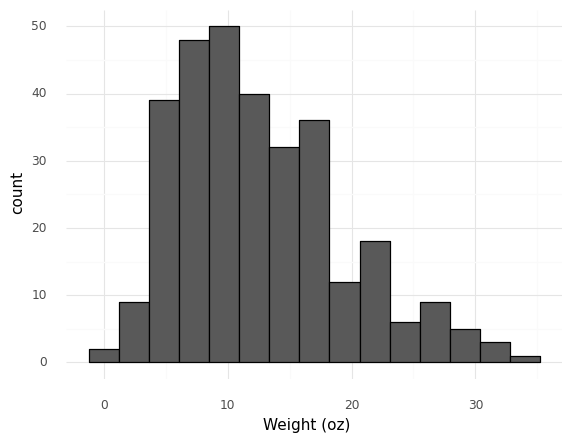

<ggplot: (8786528009725)>

In [103]:
(ggplot(ama, aes("Weight (oz)")) + geom_histogram(color = "black") + theme_minimal())

## Model

In [104]:
predictors = ["List Price", "NumPages", "Weight (oz)", "Thick", "Height", "Width"]
X = ama[predictors]
Y = ama["Amazon Price"]

In [105]:
#scale or z-score the predictors

zScore = StandardScaler()
zScore.fit(X)

Xz = zScore.transform(X)

In [127]:
LR_Model = LinearRegression() #build a model structure

In [128]:
LR_Model.fit(Xz, Y)

LinearRegression()

### Model Evaluation

In [108]:
price_pred = LR_Model.predict(Xz)

price_pred[1:10]

array([10.91587503,  0.64596322,  7.87491152, 21.75388566, 18.09350432,
       13.26001981, 10.59729274, 21.43797602,  9.48174291])

In [109]:
#calculate how our model did

mean_squared_error(Y, price_pred)

#avg squared error is 10.6 dollars (in context to whatever units the outcome is in)

10.61233860175146

In [110]:
r2_score(Y, price_pred)

#r^2 is 92%, pretty accurate

0.9205886088486431

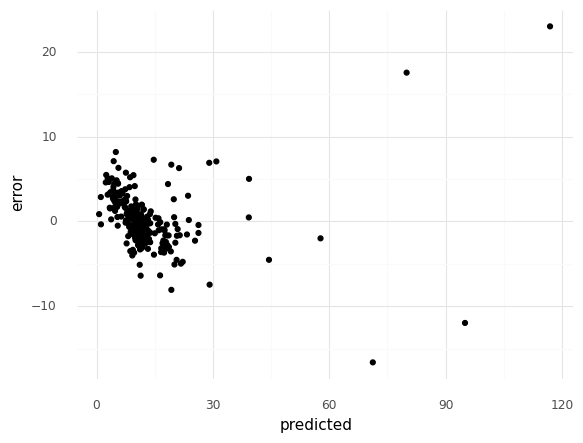

<ggplot: (8786527739522)>

In [111]:
assump = pd.DataFrame({"error": Y-price_pred, "predicted": price_pred})

ggplot(assump, aes(x="predicted", y="error")) + geom_point() + theme_minimal()
#homoscadiscity assumption is violated, predicted price for really expensive books is quite off
#what are the consequences of this violation and what change should i make?
#are most of the errors evenly distributed? closer to zero?
#is there a discernerable pattern in our scatter plot? we don't want one



In [112]:
coefficients = pd.DataFrame({"Coef":LR_Model.coef_,
              "Name": predictors})
coefficients = coefficients.append({"Coef": LR_Model.intercept_,
                    "Name": "intercept"}, ignore_index = True)

In [113]:
coefficients

,Coef,Name
0,11.401887,List Price
1,0.231519,NumPages
2,-0.419686,Weight (oz)
3,-1.159632,Thick
4,-0.098886,Height
5,-0.197179,Width
6,12.587645,intercept


### Predict

In [114]:
newBook = np.array([12.45,300,10,.8,8,5]).reshape(1,-1)
newBookz = zScore.transform(newBook)

LR_Model.predict(newBookz)

array([8.42151431])

In [115]:
newBook_inter = np.append(newBookz, 1)
newBook_inter

array([-0.41343253, -0.19260029, -0.36718493, -0.25354952, -0.15097461,
       -0.65582302,  1.        ])

In [116]:
np.sum(newBook_inter*np.array(coefficients["Coef"]))

8.421514307944573

# Bey (sklearn)

In [2]:
b = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Beyonce_data.csv")
b.head()

NameError: name 'pd' is not defined

In [118]:
# Can we predict danceability?
b.columns

Index(['Unnamed: 0', 'artist_name', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'duration_ms', 'track_name'],
      dtype='object')

In [119]:
predictors = ["energy", "key", "loudness", "speechiness",
              "acousticness", "instrumentalness", "liveness", "valence", "tempo"]

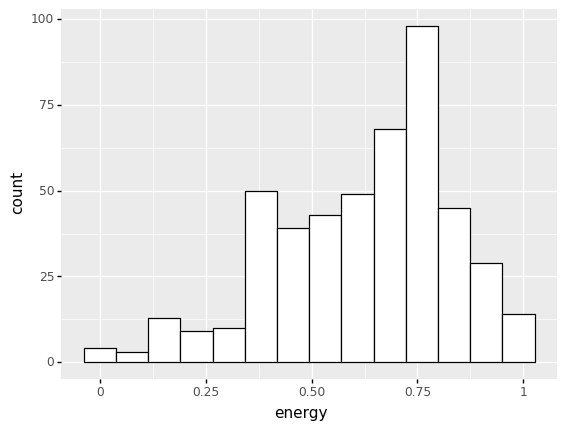

<ggplot: (8786528228744)>

In [120]:
ggplot(b, aes("energy")) + geom_histogram(color = "black", fill = "white")

## Model

In [1]:
X = b[predictors]
Y = b["danceability"]

NameError: name 'b' is not defined

In [122]:
zScoreb = StandardScaler()
zScoreb.fit(X)

Xz = zScoreb.transform(X)

In [123]:
BEY_mod = LinearRegression()

BEY_mod.fit(Xz, Y)

LinearRegression()

In [124]:
dance_pred = BEY_mod.predict(Xz)

mean_squared_error(Y, dance_pred)

10.61233860175146

In [125]:
r2_score(Y, dance_pred)

0.9205886088486431

## Prediction

In [126]:
coefficients = pd.DataFrame({"Coef":BEY_mod.coef_,
              "Name": predictors})
coefficients = coefficients.append({"Coef": BEY_mod.intercept_,
                    "Name": "intercept"}, ignore_index = True)

coefficients
#for reference: https://towardsdatascience.com/a-music-taste-analysis-using-spotify-api-and-python-e52d186db5fc

ValueError: arrays must all be same length